<h1>Modelo de predicción de Credit Score</h1>

Exploración de los datos relacionados con el Riesgo Crediticio (Credit Score), entendimiento de la distribución de sus variables, patrones y finalmente planteamiento de varios modelos de predicción y selección del que presente mejor ajuste.

## Tabla de contenido   <a id="Menú"></a> 

**1. [Introducción](#Introduction)** <br>
- Información sobre el dataset

**2. [Librerías](#Libraries)** <br>
- Importando librerías
- Importando el dataset

**3. [Explorando los datos](#Known)** <br>
- Observar los tipos de datos
- Principales medidas para las variables numéricas
- Identificación de los valores únicos para cada variable
- Detección de valores nulos
- Imputación de datos nulos
- Transformación 'One Hot Enconding' para variables categóricas nominales

**5. [Explorando algunas variables](#Explorations)** <br>
- Gráficos e información descriptiva

**4. [Correlación](#Correlation)** <br>
- Correlación de los datos

**5. [Preprocesamiento](#Preprocessing)** <br>
- Importing Libraries
- Setting X and y
- Aplicando split a 'X' e 'y' en 'Train' y 'Test' 

**6 [Exploración de modelos de aprendizaje](#Explorando_modelos)** <br>
- Curva ROC para comparar 4 diferentes modelos

**6.1 [Modelo 1](#Modelling_1)** <br>
- Modelo XGBoost 
- Score values
- Ajuste de hiperparámetros (RandomizedSearchCV, GridSearchv)
- Matriz de confusión
- Predicción

**6.2 [Modelo 2](#Modelling_2)** <br>
- Modelo Random Forest 
- Score values
- Ajuste de hiperparámetros (RandomizedSearchCV)
- Matriz de confusión
- Predicción

**6.3 [Modelo 3](#Modelling_3)** <br>
- Gaussian Naive Bayes
- Matriz de confusión
- Predicción

**7 [Créditos](#Créditos)** <br>

**8 [Referencias bibliográficas](#Referencias)** <br>

<a id="Introduction"></a> <br>
### 1. Introducción

<b> Contexto </b> <br>
El dataset original está compuesto por 1000 observaciones y 20 variables categóricas preparadas por el Dr. Hofman. Para algoritmos que requieren variables numéricas, Strathclyde University produjo el archivo "german.data-numeric". En este caso se analizará el dataset filtrado por Leonardo Ferreira.
En este conjunto de datos, cada entrada representa a una persona que recibe un crédito de un banco. Cada persona se clasifica como riesgo crediticio bueno o malo según el conjunto de atributos. El enlace al conjunto de datos original se puede encontrar a continuación.

<b> Contenido </b> <br>
Era casi imposible comprender el conjunto de datos original debido a su complicado sistema de categorías y símbolos. Por lo tanto, el autor de este dataset preparó un script de Python para convertirlo en un archivo CSV legible. Los atributos seleccionados son:
- 1.Edad (numérica)
- 2.Sexo (Categórica: masculino, femenino)
- 3.Empleo (Numérica: 0 = no calificado y no residente, 1 = no calificado y residente, 2 = calificado, 3 = altamente calificado)
- 4.Vivienda (Categórica: propio, alquilado o gratis)
- 5.Cuentas de ahorro (Categórica: pequeño, moderado, bastante rico, rico)
- 6.Cuenta corriente(Numérica, en DM - Marca Alemana)
- 7.Monto del crédito (Numérica, in DM)
- 8.Duración (Numérica, en meses)
- 9.Propósito (Categórica: auto, muebles / equipo, radio / TV, electrodomésticos, reparaciones, educación, negocios, vacaciones / otros)
- 10.Riesgo (Variable objetivo categórica: Riesgo bueno o malo)

<b> Dataset </b> <br>
https://www.kaggle.com/kabure/predicting-credit-risk-model-pipeline/data?select=german_credit_data.csv

<a id="Libraries"></a> <br>
### **2. Libraries** 
- Importing Libraries
- Importing Dataset

In [6]:
# Cargamos las librerías para manipulation, visualización, etc.
import pandas as pd 
import numpy as np
import seaborn as sns 

# Librería para trabajar con plotly
import plotly.offline as py
py.init_notebook_mode(connected=True) #permite trabajar con la versión offline de plotly 

import plotly.figure_factory as ff

import plotly.graph_objs as go  #es como plt de matplot
from plotly.subplots import make_subplots 
import  matplotlib.pyplot as plt #para plotear varios parámetros en seaborn

import warnings # Esta librería será usada para ignorar algunas advertencias
from collections import Counter # Para hacer el counter de algunas variables

## Cargamos las librerías de  Machine Learning
# Para 'split' los datos y cross val
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV,  RandomizedSearchCV
# Para evaluar nuestro modelo 
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_auc_score, classification_report, fbeta_score
from sklearn import model_selection,linear_model, metrics   #agregado

from sklearn.preprocessing import StandardScaler   
#from sklearn.preprocessing import LabelEncoder, StandardScaler

# Algoritmos para aplicar y hallar uno que mejor modele nuestro problema
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


# Para graficar la importancia de variables en XG Boost
from xgboost import plot_importance 

from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV, train_test_split

In [7]:
#Importing the data
data_file = pd.read_csv("german_credit_data_with_target.csv",index_col=0) 

<a id="Known"></a> <br>
# **3. Análisis exploratorio de datos**  
En esta sección se realiza un análisis de las diferentes variables categóricas y numéricas, sus distribuciones, gráficas, además se realizarán las transformaciones a dichas features cuando se considere necesario. Tenemos entre otros temas:
- Observar los tipos de datos
- Principales medidas para las variables numéricas
- Identificación de los valores únicos para cada variable
- Detección de valores nulos
- Imputación de datos nulos
- Transformación 'One Hot Enconding' para variables categóricas nominales

**[Regresar al menú principal](#Menú)** 

In [8]:
#Buscando datos perdidos, tipo de datos y conociendo el tipo de objeto que es nuestro dataset
print(data_file.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


La variable checking account muestra un total de 606 valores no nulos, es decir 394 datos faltantes.

In [9]:
data_file.shape

(1000, 10)

In [10]:
#Buscamos valores únicos
print(data_file.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [11]:
#Obtenemos las primeras filas de nuestro dataset
data_file.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [12]:
#Para obtener resumen de algunas medidas para las variables numéricas
data_file.describe() 

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [13]:
missing_categorical = [var for var in data_file.columns if data_file[var].isnull().mean()>0
                        and data_file[var].dtypes == 'O']

In [14]:
missing_categorical

['Saving accounts', 'Checking account']

In [15]:
data_file['Saving accounts'].isnull().mean()

0.183

In [16]:
data_file['Saving accounts'].isnull().sum()

183

In [17]:
data_file['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [18]:
print(603+103+63+48)

817


<AxesSubplot:>

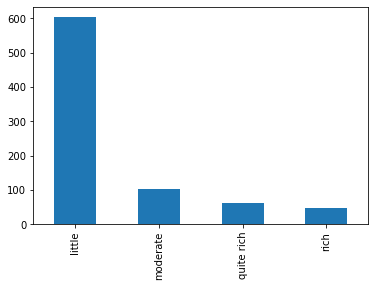

In [19]:
data_file['Saving accounts'].value_counts().plot.bar()   

In [20]:
data_file['Saving accounts'].mode()   #la categoría más frecuente (moda) es 'little'

0    little
dtype: object

In [21]:
data_file['Saving accounts'].fillna('little', inplace=True)

In [22]:
data_file['Saving accounts'].isnull().sum()

0

In [23]:
# Checking account valores perdidos

In [24]:
data_file['Checking account'].isnull().sum()

394

In [25]:
data_file['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

<AxesSubplot:>

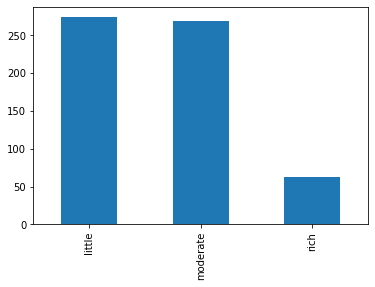

In [26]:
data_file['Checking account'].value_counts().plot.bar()   

In [27]:
data_file['Checking account'].mode()   #la categoría más frecuente (moda) es 'little'

0    little
dtype: object

In [28]:
data_file['Checking account'].fillna('little', inplace=True)

In [29]:
data_file['Checking account'].isnull().sum()

0

In [30]:
df_credit = data_file

In [31]:
df_credit.shape

(1000, 10)

In [32]:
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [33]:
data_file['Risk'].mode()

0    good
dtype: object

<AxesSubplot:>

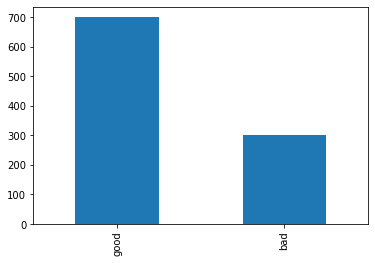

In [34]:
data_file['Risk'].value_counts().plot.bar() 

<h3>Variable Risk y su distribución</h3>

In [36]:
# Usaremos la librería plotly 
trace0 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().values,
            name='Buen crédito'
    )

# En trace1 creamos un vector para x,representa la frecuencia del Riesgo "malo", 'y' el conteo de valores del riesgo "malo".
trace1 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().values,
            name='Mal crédito'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Conteo'
    ),
    xaxis=dict(
        title='Variable Risk'
    ),
    title='Distribución de la variable objetivo "Riesgo"'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

* <b>  Comentario: </b> <br>
Se observa que la variable objetivo Risk, se divide en dos categorías. Por un lado, Risk_good con un total de 700 créditos otorgados, cuyos clientes poseen un buen crédito. Por otro lado 'Risk_bad' con un total de 300. Por tal motivo, se puede decir que se trata de una variable balanceada.

<h3>Variable Edad</h3>

In [37]:
# Implementamos algunas gráficas interactivas
# Distribución de crédito bueno y malo por edad y distribución general de Edad

df_good = df_credit.loc[df_credit["Risk"] == 'good']['Age'].values.tolist()
df_bad = df_credit.loc[df_credit["Risk"] == 'bad']['Age'].values.tolist()
df_age = df_credit['Age'].values.tolist()

# Primer plot  #puse shift+tab para ver si encuentro el parámetro de color pero no lo encontré
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Buen crédito"
)
# Segundo plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Mal crédito"
)
# Tercer plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Edad general"
)

# Creando la grilla
fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Crédito bueno por Edad','Crédito malo por Edad', 'Distribución General'))

# Seteando las figuras
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Distribución de la variable "Edad"', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

<b>Comentario: </b> La variable edad muestra una asimetría derecha bastante marcada, tanto en su análisis general como discriminado por tipo de Riesgo.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



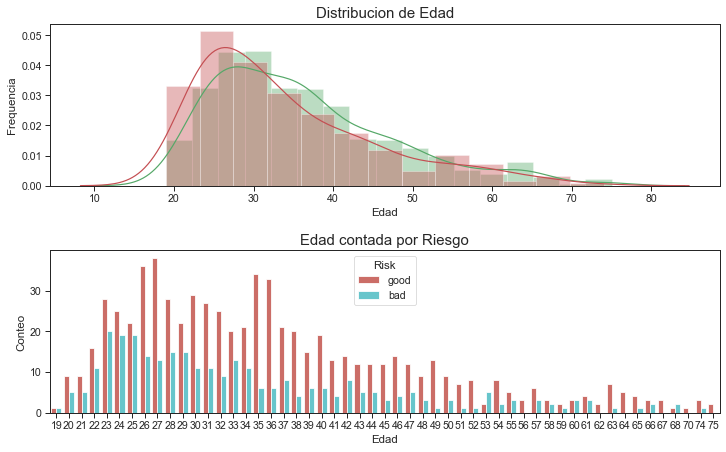

In [714]:
# HLS (hue, saturation, and luminance) o tono , saturación y luminancia.

df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8)) 
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Age"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["Age"], ax=ax[0], 
             color='r')
g1.set_title("Distribucion de Edad", fontsize=15)  
g1.set_xlabel("Edad")
g1.set_ylabel("Frequencia")


g2 = sns.countplot(x="Age",data=df_credit, 
              palette="hls", ax=ax[1], 
              hue = "Risk")   
g2.set_title("Edad contada por Riesgo", fontsize=15)
g2.set_xlabel("Edad")
g2.set_ylabel("Conteo")
plt.show()

<b> * Comentario: </b>
- En la primera gráfica se observa que la distribución de 'Risk_bad' es un tanto más apuntalada, con sesgo marcado a la derecha, alcanzando su pico más alto en el grupo etario de 20 a 30 años. El score 'malo' va disminuyendo para los clientes de mayor edad, aproximadamente desde la edad de 35 años. Para el caso de 'Risk_good', se observa una distribución un tanto diferente, menos apuntalada y con su pico alto entre los 25 y 30 años, aunque se mantiene relativamente alto cercano a los 40 años. Además, en la gráfica Distribución por Edad, se observa mayor concentración de créditos en los grupos de edad menores a 50 años de edad.

- En la segunda gráfica, se puede observar el riesgo por edades simples, en todas las edades el 'Risk_good' es más alto que el 'Risk_bad', lo cual es deseable. La edad que registra mayor score crediticio bueno, corresponde a los 27 años, mientras que para el score malo, los 23 años resulta ser la edad con el registro más alto.

#### Creando una variable para categorizar la variable Edad

In [38]:
#Veamos la columna Monto del crédito    #Acá ya agregamos Age_cat
interval = (18, 25, 35, 60, 120)

cats = ['Estudiante', 'Joven', 'Adulto', 'Adulto mayor']  #cats = categorías
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)


df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']  #edad marcador

In [39]:
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,67,male,2,own,little,little,1169,6,radio/TV,good,Adulto mayor
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Estudiante
2,49,male,1,own,little,little,2096,12,education,good,Adulto
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Adulto
4,53,male,2,free,little,little,4870,24,car,bad,Adulto


In [40]:
# go graphical objects, Box de boxplot
trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Age_cat"],
    name='Buen crédito',
    marker=dict(
        color='#3D9980'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Age_cat'],
    name='Mal crédito',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Monto del crédito (USD)',
        zeroline=False
    ),
    xaxis=dict(
        title='Edad categorizada'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

* <b> Comentario: </b> <br> Se observa que las categorías de edad Adulto y Adulto mayor presentan mal crédito así como mayor monto de crédito.  Los montos para las categorías Joven y Estudiante, no superan los USD.5000, aunque se observan ciertos datos atípicos que sobrepasan ese umbral en el monto.  
Además, esta gráfica nos muestra la presencia de ciertos valoress atípicos para cada una de las 4 categorías de  la variable Edad. Por ejemplo, se puede observar que la categoría Joven, muestra el valor atípico más alto (monto de crédito de USD. 18424) La categoría Adulto Mayor es la que muestra menor cantidad de 'outliers'.

<h3>Explorando la Distribución de Propiedad de la Vivienda y Renta por Riesgo</h3>

In [41]:
#Primer plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().values,
    name='Buen crédito'
)

#Segundo plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().values,
    name="Mal crédito"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Distribución de la variable "Vivienda"'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

* <b> Comentario: </b>  <br> Se puede observar que la propiedad sobre la vivienda y Risk_good tienen una correlación alta. Acorde a esto, se puede notar que han sido entregados más de 700 créditos a quienes poseen una vivienda propia (own) de los cuales más de 500 tienen buen crédito y casi 200 mal crédito; mientras que para quienes aseguraron vivir en una vivienda rentada, se otorgaron menos de 200 créditos, de los cuales poco más de 100 poseen Risk_good (color azul). Se observan patrones interesante, los valores más altos provienen de la categoría "free" y tenemos una distribución diferente por riesgo.

<h3>Variable Sexo</h3>

In [42]:
#Primer plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Sex"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Sex"].value_counts().values,
    name='Buen crédito'
)

#Primer plot 2
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Sex"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Sex"].value_counts().values,
    name="Mal crédito"
)

#Segundo plot
trace2 = go.Box(
    x = df_credit[df_credit["Risk"]== 'good']["Sex"],
    y = df_credit[df_credit["Risk"]== 'good']["Credit amount"],
    name=trace0.name
)

#Segundo plot 2
trace3 = go.Box(
    x = df_credit[df_credit["Risk"]== 'bad']["Sex"],
    y = df_credit[df_credit["Risk"]== 'bad']["Credit amount"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]


fig = make_subplots(rows=1, cols=2, 
                        subplot_titles=('Conteo de créditos por Sexo', 'Monto del crédito por Sexo'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Distribución por la variable "Sexo"', boxmode='group')
py.iplot(fig, filename='sex-subplot')

<b> * Comentario: </b> <br>Se observa que la  mayor proporción de 'buen crédito' corresponde a hombres (alrededor de 690 créditos) y a mujeres un total de 310. En términos porcentuales se registró un 38.27% de morosidad en hombres frente al número de créditos otorgados, mientras que un 54.22% de mujeres han incurrido en algún tipo de incumplimiento por lo cual se registraron con Mal crédito. Sería interesante ampliar el análisis causal de esta diferencia en futuros estudios. <br> <br>En cuanto a los montos recibidos por concepto de crédito, se observa que los hombres han recibido montos mayores a los USD.5000, registrando ciertos valores atípicos con valores superiores a los USD.150000, al igual que en el caso de las mujeres, aunque aparentemente en menor proporción.

In [43]:
# numerical variables
num_cols = pd.DataFrame(df_credit[df_credit.select_dtypes(include=['float', 'int64']).columns])
# print the numerical variables   **
num_cols.columns

Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')

<h3>Otras visualizaciones</h3>

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\user\anaconda3\lib\site-package

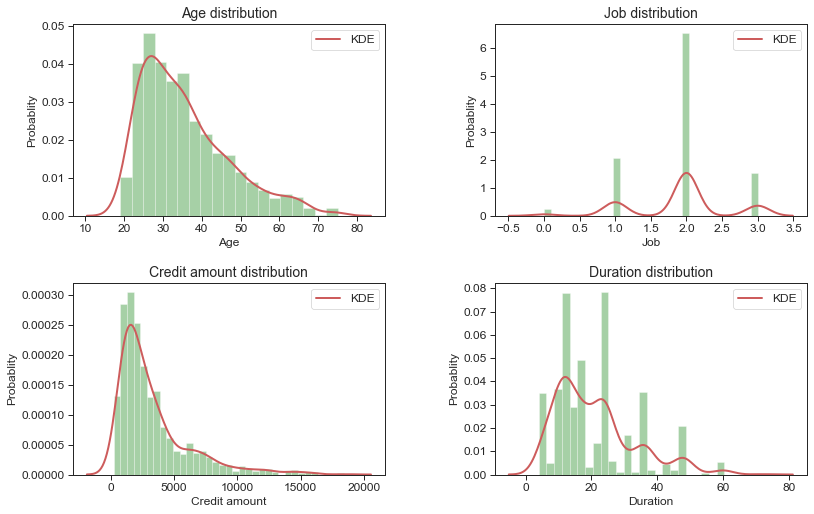

In [721]:
# drop the label column 'loan status' before visualization 
#num_cols_hist = num_cols.drop(['loan_status'], axis=1)
num_cols_hist = num_cols

# visualize the distribution for each variable
plt.figure(figsize=(12,16))

for i, col in enumerate(num_cols_hist.columns):
    idx = int('42'+ str(i+1))
    plt.subplot(idx)
    sns.distplot(num_cols_hist[col], color='forestgreen', 
                 kde_kws={'color': 'indianred', 'lw': 2, 'label': 'KDE'})
    plt.title(col+' distribution', fontsize=14)
    plt.ylabel('Probablity', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['KDE'], prop={"size":12})

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)
plt.show()

<b>• Comentario: </b> <br> Se observa que todas las distribuciones de las variables 'Edad' y 'Monto de crédito', son asimétricas positivas.
<br>- Edad: Observamos que existen mayor concentración de prestamistas en el grupo etario de 20 a 40 años, y va disminuyendo conforme aumenta la edad.
<br>- Empleo: En cuanto a la distribución de trabajo, existe una amplia diferencia en el número de clientes categorizado como 'cualificado'.
<br>- Monto del crédito: La mayoría de créditos otorgados corresponden a montos de menos de 5000. Se observa que existe un marcado sesgo a la derecha.
<br>-Duración (en meses): Se observa que la mayoría de créditos corresponden a aquellos otorgados para menos de 40 meses.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



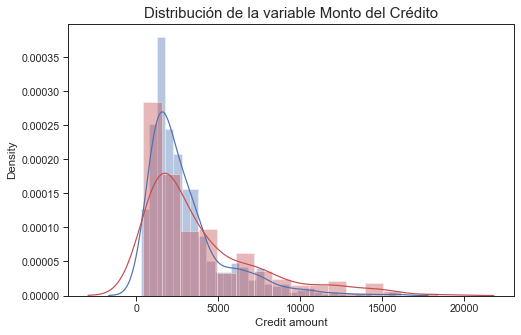

In [722]:
#Ploting the good and bad dataframes in distplot
plt.figure(figsize = (8,5))

g= sns.distplot(df_good['Credit amount'], color='b')
g = sns.distplot(df_bad["Credit amount"], color='r')
g.set_title("Distribución de la variable Monto del Crédito", fontsize=15)
plt.show()

<b> * Comentario: </b> <br> 
Se observa que gran parte de los valores se encuentran por debajo de los USD.5000, mientras que para montos superiores a este valor son cada vez menores.
En cuanto al Risk_good (color azul), la densidad más alta se ubica en los montos más bajos. Su curva se muestra  mucho más apuntalada que la curva de Risk_bad. Para riesgo bad, se observa que la curva se alarga mientras mayor sea el monto, es decir que a mayor el monto, más posibilidades de mostrar Risk_bad, lo cual tiene sentido.


#### Tablas cruzadas para Sexo y Propósito del crédito 

In [723]:
#Para explorar estas variables con mayor profundidad.

In [724]:
print(pd.crosstab(df_credit.Sex, df_credit.Job))

Job      0    1    2    3
Sex                      
female  12   64  197   37
male    10  136  433  111


In [725]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_credit[date_int[0]], df_credit[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


<b> * Comentario: </b> <br>
Se observa que los créditos corresponden en gran medida al propósito 'car' y 'radio/tv' pero se desconocen si los objetivos de la compra de estos bienes y servicios serán destinados al consumo o por el contrario, el objetivo será de uso para inversión, un negocio o emprendimiento. Por otro lado, otro objetivo del crédito corresponde a 'furniture/equipment'. En menor medida, estos créditos otorgados fueron destinados a 'business' y 'vacation/others', etc.

### Exploración de Variables categóricas

#### Observamos el total de valores en cada variable categórica

In [726]:
#Imprimimos los valores únicos de las variables categóricas
print("Purpose : ",df_credit.Purpose.unique())
print("Sex : ",df_credit.Sex.unique())
print("Housing : ",df_credit.Housing.unique())
print("Saving accounts : ",df_credit['Saving accounts'].unique())
print("Risk : ",df_credit['Risk'].unique())
print("Checking account : ",df_credit['Checking account'].unique())
print("Age_cat : ",df_credit['Age_cat'].unique())  #suele salir error en Age_cat, solo hay que volver a correr
print("Job:", df_credit['Job'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  ['little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' 'rich']
Age_cat :  ['Adulto mayor', 'Estudiante', 'Adulto', 'Joven']
Categories (4, object): ['Estudiante' < 'Joven' < 'Adulto' < 'Adulto mayor']
Job: [2 1 3 0]


In [727]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1000 non-null   int64   
 1   Sex               1000 non-null   object  
 2   Job               1000 non-null   int64   
 3   Housing           1000 non-null   object  
 4   Saving accounts   1000 non-null   object  
 5   Checking account  1000 non-null   object  
 6   Credit amount     1000 non-null   int64   
 7   Duration          1000 non-null   int64   
 8   Purpose           1000 non-null   object  
 9   Risk              1000 non-null   object  
 10  Age_cat           1000 non-null   category
dtypes: category(1), int64(4), object(6)
memory usage: 119.4+ KB


### One Hot Encoding 

Creamos Variables Dummies para las features anteriores. Usaremos el método get_dummies de Pandas (y no con Scikit-learn)

In [728]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

### Transformando los datos en Variables Dummy

In [729]:
df_credit.info()  #Está agregada Age y Age_cat, posteriormente se aplica un .drop a Age

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1000 non-null   int64   
 1   Sex               1000 non-null   object  
 2   Job               1000 non-null   int64   
 3   Housing           1000 non-null   object  
 4   Saving accounts   1000 non-null   object  
 5   Checking account  1000 non-null   object  
 6   Credit amount     1000 non-null   int64   
 7   Duration          1000 non-null   int64   
 8   Purpose           1000 non-null   object  
 9   Risk              1000 non-null   object  
 10  Age_cat           1000 non-null   category
dtypes: category(1), int64(4), object(6)
memory usage: 119.4+ KB


In [730]:
# Añadimos al dataset las variables dummy. df_credit es nuestro dataset
#Purpose to Dummies Variable
df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)

#Sex feature in dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)

# Housing get dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)

# Housing get Saving Accounts
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)

# Housing get Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)

# Housing get Checking Account
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)

# Housing get Age categorical
df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

# Categorías de Job
df_credit = df_credit.merge(pd.get_dummies(df_credit["Job"], drop_first=True, prefix='Job'), left_index=True, right_index=True)

In [731]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Age                          1000 non-null   int64   
 1   Sex                          1000 non-null   object  
 2   Job                          1000 non-null   int64   
 3   Housing                      1000 non-null   object  
 4   Saving accounts              1000 non-null   object  
 5   Checking account             1000 non-null   object  
 6   Credit amount                1000 non-null   int64   
 7   Duration                     1000 non-null   int64   
 8   Purpose                      1000 non-null   object  
 9   Risk                         1000 non-null   object  
 10  Age_cat                      1000 non-null   category
 11  Purpose_car                  1000 non-null   uint8   
 12  Purpose_domestic appliances  1000 non-null   uint8   
 13  Purp

### Borrando las columnas que ya no se usarán

In [732]:
#Excluyendo las columnas que ya no se van a usar, las first columns
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]   
del df_credit["Risk"]
del df_credit['Risk_good']    
del df_credit['Age']          
del df_credit['Job']

In [733]:
df_credit  #23 var.total: 22 independientes y 1 variable objetivo: Risk_bad (no se incluye Saving Accounts)

,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,...,Savings_rich,Risk_bad,Check_moderate,Check_rich,Age_cat_Joven,Age_cat_Adulto,Age_cat_Adulto mayor,Job_1,Job_2,Job_3
0,1169,6,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,5951,48,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,2096,12,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,7882,42,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,4870,24,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1736,12,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
996,3857,30,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
997,804,12,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
998,1845,45,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [734]:
df_credit.info()
#Salen 24 variables incluida la variable dependiente "Bad risk" que es la dependiente

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Credit amount                1000 non-null   int64
 1   Duration                     1000 non-null   int64
 2   Purpose_car                  1000 non-null   uint8
 3   Purpose_domestic appliances  1000 non-null   uint8
 4   Purpose_education            1000 non-null   uint8
 5   Purpose_furniture/equipment  1000 non-null   uint8
 6   Purpose_radio/TV             1000 non-null   uint8
 7   Purpose_repairs              1000 non-null   uint8
 8   Purpose_vacation/others      1000 non-null   uint8
 9   Sex_male                     1000 non-null   uint8
 10  Housing_own                  1000 non-null   uint8
 11  Housing_rent                 1000 non-null   uint8
 12  Savings_moderate             1000 non-null   uint8
 13  Savings_quite rich           1000 non-null   uint

Job tiene 4 categorías
* 0: unskilled and non-resident categoría borrada para evitar colinealidad, 
* 1 - unskilled and resident, 
* 2 - skilled, 
* 3 - highly skilled

* Comentario: Risk_bad es la variable objetivo y puede tomar valores como 0 o 1

# **5. Correlación** <a id="Correlation"></a> <br>
- Observamos la correlación de los datos
<h1>Correlación de los datos

**[Regresar al menú principal](#Menú)** 

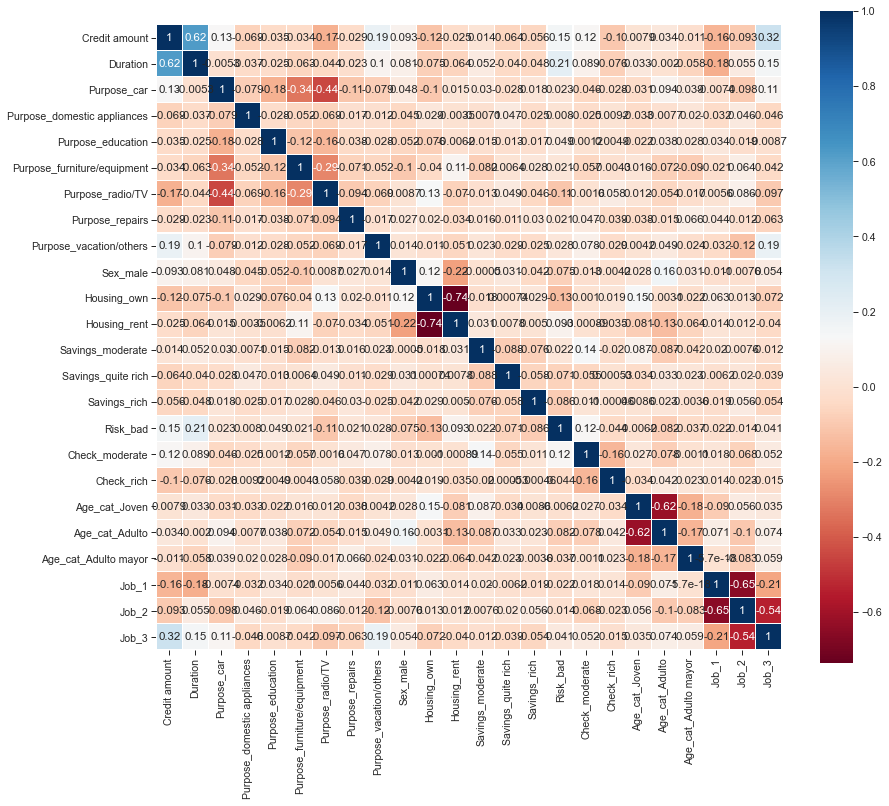

In [735]:
plt.figure(figsize=(14,12))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', cmap='RdBu', annot=True)
plt.show()

* Comentario: Recordar que Risk_bad es la variable objetivo. El color rojo representa correlación negativa mientras que el color azul, positiva. Se observa que las variables Credit_amount y Duration, muestran correlación positiva alta (0.62). Se observa también que si posee casa propia (Housing_own), menos probabilidades de incurrir en Risk_bad (0.13 en tono rojo).

# **6. Explorando modelos de aprendizaje** <a id="Explorando_modelos"></a> <br>
- Importando las librerías de ML
- Preprocesamiento de variables (de ser necesario)
- Establecer las variables para la predicción
- División de los datos (splitting)
- Ajuste de hiperparámetros para mejora de modelos (Randomized Search CV, Grid Search)
- Predicciones
- Confusion matrix
- Evaluación de cada modelo

**[Regresar al menú principal](#Menú)** 

In [736]:
df_credit['Credit amount'] = np.log(df_credit['Credit amount'])

In [737]:
#Preparando los datos antes del split
#Con este paso previo, podemos tener X_train, y_train, X_test, y_test para que se queden como 
#dataframe y no como array de numpy
features_df = []
features_df = df_credit.drop(['Risk_bad'], axis=1)  
                                            
y = df_credit["Risk_bad"].values 
#label_risk=pd.DataFrame(df_credit, columns=['Risk_bad'])

In [738]:
#X_train, X_test, y_train, y_test = train_test_split(features_df, label_risk, test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(features_df, y, test_size=0.30, random_state=42)

print('Dimensiones del dataset que serán usados para entrentamiento:  Imput features o X' +str(X_train.shape)+
" \n Output label o y" +str(y_train.shape))
print("Dimensiones del dataset que serán usadas para testing: Imput features o X"+str(X_test.shape)+
" \n Output label o y" + str(y_test.shape))


Dimensiones del dataset que serán usados para entrentamiento:  Imput features o X(700, 23) 
 Output label o y(700,)
Dimensiones del dataset que serán usadas para testing: Imput features o X(300, 23) 
 Output label o y(300,)


In [739]:
X_train.shape

(700, 23)

In [740]:
type(X_train)

pandas.core.frame.DataFrame

In [741]:
type(y_train)

numpy.ndarray

### Explorando modelos entre diversas alternativas 
Comparación de 4 algoritmos comparando su Recall. Se compararán los modelos: Regresión Logística, XGBoost, Random Forest y Gaussian Naive Bayes.

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\user\anaconda3\lib\site-packages\sk

LR: 0.241623 (0.054223)
NB: 0.554244 (0.103296)
RF: 0.267857 (0.083267)
[14:36:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:36:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

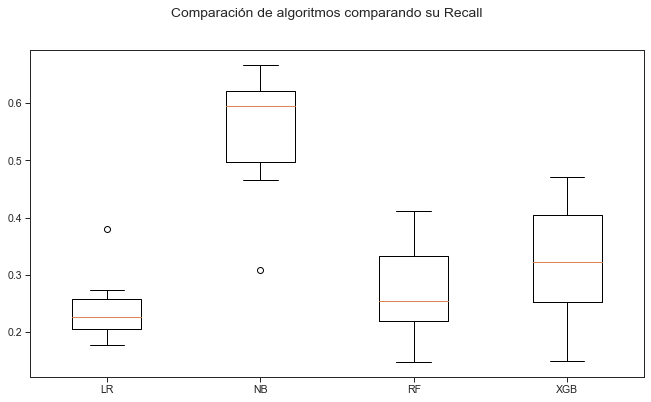

In [742]:
# Feed del Random state
seed = 7

# preparando los modelos
models = []  
models.append(('LR', LogisticRegression()))   
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))

# Evaluar cada modelo de turno
results = []
names = []
scoring = 'recall'

# Para sacar una tabla de comparación que contiene los nombres de cada modelo y su 
# cv_results media y std
for name, model in models:
        kfold = KFold(n_splits=10)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)   #en la lista names, va a agregar name
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# Para obtener una comparación gráfica de los modelos 
# boxplot de comparación de algoritmos
fig = plt.figure(figsize=(11,6))
fig.suptitle('Comparación de algoritmos comparando su Recall') #sobre el set de train
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<b> * Comentario: </b>  <br>
Se observa un mejor score Recall con el modelo Naive Bayes. el modelo de Regresión Logística es el que presenta un valor menor para Recall. Por esta razón se emplearán 3 modelos para evaluar su rendimiento sobre nuestros datos.

In [743]:
models

[('LR', LogisticRegression()),
 ('NB', GaussianNB()),
 ('RF', RandomForestClassifier()),
 ('XGB',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                random_state=None, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                validate_parameters=None, verbosity=None))]

In [744]:
# define a model assess function to test a few model performance
def model_assess(model, name='Default'):
    '''
    This function is used to test model performance 
    
    Input: model, defined classifer
    Output: print the confusion matrix
    
    '''
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    preds_proba = model.predict_proba(X_test)
    print(name, '\n',classification_report(y_test, model.predict(X_test)))

In [745]:
#Logistic Regression
lg = LogisticRegression(random_state=42)
model_assess(lg, 'Logistic Regression')

#Random Forest, setting the hyperparameters
r_forest = RandomForestClassifier(max_depth=10, max_features=20, n_estimators=3, random_state=42)
model_assess(r_forest, "Random Forest Classifier")

#XGB
xgb = XGBClassifier(max_depth=10, random_state=42) 
model_assess(xgb, 'XGBoost')

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Logistic Regression 
               precision    recall  f1-score   support

           0       0.72      0.91      0.81       209
           1       0.49      0.20      0.28        91

    accuracy                           0.69       300
   macro avg       0.60      0.55      0.54       300
weighted avg       0.65      0.69      0.65       300

Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.73      0.81      0.76       209
           1       0.40      0.30      0.34        91

    accuracy                           0.65       300
   macro avg       0.56      0.55      0.55       300
weighted avg       0.63      0.65      0.64       300

[14:36:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost 
               precision    recall  

### Definimos una función para evaluar cada modelo

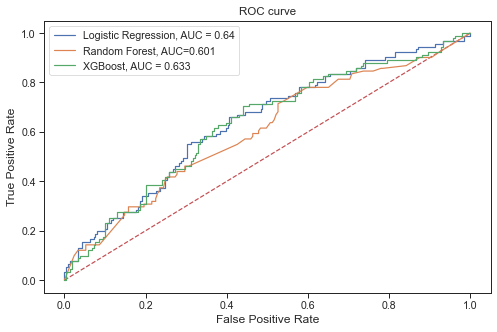

In [746]:
#ROC AUC
fig = plt.figure(figsize=(8,5))
plt.plot([0, 1], [0, 1],'r--')

#Logistic Regression
preds_proba_lg = lg.predict_proba(X_test)
probslg = preds_proba_lg[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probslg)
auclg = roc_auc_score(y_test, probslg)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclg,3))}')

#Random Forest  #agregadovm
preds_proba_rfor = r_forest.predict_proba(X_test)
probsR_for = preds_proba_rfor[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsR_for)
aucrf=roc_auc_score(y_test, probsR_for)
plt.plot(fpr, tpr, label=f'Random Forest, AUC={str(round(aucrf, 3))}')

#XGBoost
preds_proba_xgb = xgb.predict_proba(X_test)
probsxgb = preds_proba_xgb[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsxgb)
aucxgb = roc_auc_score(y_test, probsxgb)
plt.plot(fpr, tpr, label=f'XGBoost, AUC = {str(round(aucxgb,3))}')
plt.ylabel("True Positive Rate", fontsize=12)
plt.xlabel("False Positive Rate", fontsize=12)
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 16
plt.legend()
plt.show()

# **6.1 Modelo 1: XGBoost** <a id="Modelling_1"></a> <br>
- Usaremos XGBoost para predecir el credit score
- Aplicaremos hiperparameter tunning
- Predicción
- Matriz de confusión

**[Regresar al menú principal](#Menú)** 

A continuación, se hará fit del dataset, teniendo en cuenta los 3 modelos que  presentan mejor score. Nota: no se incluyó en la gráfica el modelo Gaussian Naive Bayes que se analizará posteiormente.

In [747]:
print('El conjunto de entrenamiento tiene: {} datos \nEl set de evaluación tiene: {} datos'.
      format(X_train.shape[0], X_test.shape[0]))

El conjunto de entrenamiento tiene: 700 datos 
El set de evaluación tiene: 300 datos


## Importancia de las features

In [748]:
# print the xgb base model
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [749]:
print(xgb.feature_importances_)

[0.03638193 0.05378383 0.04265312 0.         0.04621194 0.03993347
 0.0666259  0.06643556 0.         0.04309712 0.05566759 0.04257463
 0.04987031 0.03878052 0.06362396 0.04500978 0.03272881 0.03842555
 0.0560137  0.02977814 0.06724136 0.03806956 0.04709327]


[]

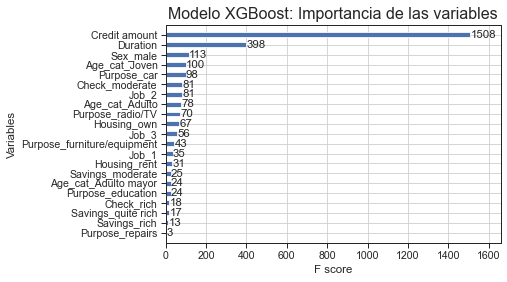

In [750]:
plot_importance(xgb, title='Modelo XGBoost: Importancia de las variables', ylabel='Variables', height=0.50, grid=True).plot(kind='bar')

In [751]:
xgb.get_booster().get_fscore()

{'Duration': 398,
 'Credit amount': 1508,
 'Purpose_radio/TV': 70,
 'Age_cat_Adulto': 78,
 'Job_2': 81,
 'Purpose_car': 98,
 'Check_moderate': 81,
 'Purpose_furniture/equipment': 43,
 'Housing_own': 67,
 'Job_1': 35,
 'Check_rich': 18,
 'Housing_rent': 31,
 'Sex_male': 113,
 'Age_cat_Joven': 100,
 'Savings_moderate': 25,
 'Job_3': 56,
 'Purpose_education': 24,
 'Age_cat_Adulto mayor': 24,
 'Savings_quite rich': 17,
 'Savings_rich': 13,
 'Purpose_repairs': 3}

Comentario: Se observa que la variable Monto del crédito, Duración, Sexo Masculino son variables que tienen mayor impacto sobre la variable objetivo.

In [752]:
#no me están saliendo los nombres completos
Features=list(df_credit.columns)
print(Features)

['Credit amount', 'Duration', 'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs', 'Purpose_vacation/others', 'Sex_male', 'Housing_own', 'Housing_rent', 'Savings_moderate', 'Savings_quite rich', 'Savings_rich', 'Risk_bad', 'Check_moderate', 'Check_rich', 'Age_cat_Joven', 'Age_cat_Adulto', 'Age_cat_Adulto mayor', 'Job_1', 'Job_2', 'Job_3']


#### Hyperparameter Tuning con RandomizedSearchCV (más rápida)

In [753]:
# RandomizedSearchCV hyperparameter tuning; params es la grid de parámetros.
params_xgb = {
    "colsample_bytree": [0.75, 0.8, 0.9], #  default=1; Valores típicos: 0.5-1
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4], # 0 es por default
    "learning_rate": [0.001, 0.01, 0.1, 0.5], #default value 0.1 
    "max_depth": [4, 5, 6], # rango de 4, 5, 6  por default=6
    "n_estimators": [100, 200, 300], # 100-300   #default value=100
    "subsample": [0.75, 0.8, 0.9] # 0.9-1  #a float (0,1] typical value  0.80 (GBM Parameters in excel de analytics vidhia )
}


RandomS_CV = RandomizedSearchCV(xgb, param_distributions=params_xgb, random_state=42, 
                            n_iter=100, cv=5, verbose=1, n_jobs=1, return_train_score=True)

RandomS_CV.fit(X_train, y_train)   #acá se 'cocina' ya la predicción

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[14:37:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:37:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:37:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:37:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:37:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:37:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:38:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:38:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:38:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:38:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:39:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:39:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:39:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:39:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:40:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:40:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:40:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  3.6min finished


[14:40:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=10,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=8,
                                           num_p...
                                           scale_pos_weight=1, subsample=1,
                                           tree_method='exac

In [754]:
# function to return the top 3 selected models
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Modelo con rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
report_best_scores(RandomS_CV.cv_results_, 3)

Modelo con rank: 1
Mean validation score: 0.724 (std: 0.017)
Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.9}

Modelo con rank: 2
Mean validation score: 0.721 (std: 0.013)
Parameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.001, 'gamma': 0.3, 'colsample_bytree': 0.9}

Modelo con rank: 2
Mean validation score: 0.721 (std: 0.022)
Parameters: {'subsample': 0.75, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.9}



In [755]:
#Acá muestro únicamente el modelo con el primer best scroe y best parameters. 
# no cambia en c/run
RandomS_CV.best_score_
RandomS_CV.best_params_

{'subsample': 0.8,
 'n_estimators': 200,
 'max_depth': 6,
 'learning_rate': 0.01,
 'gamma': 0.1,
 'colsample_bytree': 0.9}

In [756]:
Random_best_xgb = RandomS_CV.best_estimator_
#Random_best_xgb.fit(X_train, y_train) 
Random_best_xgb.fit(X_train, np.ravel(y_train)) 
preds_proba_Random = Random_best_xgb.predict_proba(X_test)  #Random por Random Search CV
probs_Random = preds_proba_Random[:, 1]
Random_bestauc = roc_auc_score(y_test, probs_Random)
print ('\n')
print ('xgb base model AUROC score: {}'.format(aucxgb))
print ('xgb best model using RandomizedSearchCV AUROC score: {}'.format(Random_bestauc))

[14:40:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


xgb base model AUROC score: 0.6334717913665281
xgb best model using RandomizedSearchCV AUROC score: 0.6602870813397128


In [757]:
#GridSearchCV hyperparameter tuning empleando los best parameters obtenidos en RandomizedSearchCV 
params_gscv_xgb = {
    "colsample_bytree": [0.90],
    "gamma": [0.10],
    "learning_rate": [0.01], # default 0.1 
    "max_depth": [5,6], # default 3 according notebook de zhaoyunma
    "n_estimators": [200, 205, 250], # default 100
    "subsample": [0.74, 0.75, 0.76]
}

Grid_CV = GridSearchCV(xgb, param_grid=params_gscv_xgb, cv=10, verbose=1, n_jobs=1, return_train_score=True)
Grid_CV.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[14:40:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:40:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:40:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:41:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:41:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:41:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:41:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.5min finished


[14:42:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=10,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, random_state=42,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
      

In [758]:
#Los resultados previos
"""'{'subsample': 0.8,
 'n_estimators': 200,
 'max_depth': 6,
 'learning_rate': 0.01,
 'gamma': 0.1,
 'colsample_bytree': 0.9"""

"'{'subsample': 0.8,\n 'n_estimators': 200,\n 'max_depth': 6,\n 'learning_rate': 0.01,\n 'gamma': 0.1,\n 'colsample_bytree': 0.9"

In [759]:
report_best_scores(Grid_CV.cv_results_, 3) #al parecer está cambiando con c/run

Modelo con rank: 1
Mean validation score: 0.723 (std: 0.038)
Parameters: {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250, 'subsample': 0.76}

Modelo con rank: 2
Mean validation score: 0.721 (std: 0.034)
Parameters: {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.75}

Modelo con rank: 2
Mean validation score: 0.721 (std: 0.034)
Parameters: {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 205, 'subsample': 0.75}

Modelo con rank: 2
Mean validation score: 0.721 (std: 0.035)
Parameters: {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 205, 'subsample': 0.76}

Modelo con rank: 2
Mean validation score: 0.721 (std: 0.037)
Parameters: {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250, 'subsample': 0.75}

Modelo con rank: 2
Mean validation 

In [760]:
Grid_best_xgb = Grid_CV.best_estimator_
Grid_best_xgb.fit(X_train, np.ravel(y_train)) 
preds_proba_Grid = Grid_best_xgb.predict_proba(X_test)
probs_Grid = preds_proba_Grid[:, 1]
Grid_bestauc = roc_auc_score(y_test, probs_Grid)
print ('\n')
print ('xgb base model AUROC score: {}'.format(aucxgb))
print ('xgb best model usando RandomizedSearchCV AUROC score: {}'.format(Random_bestauc))
print ('xgb best model usando GridSearchCV AUROC score: {}'.format(Grid_bestauc))

[14:42:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


xgb base model AUROC score: 0.6334717913665281
xgb best model usando RandomizedSearchCV AUROC score: 0.6602870813397128
xgb best model usando GridSearchCV AUROC score: 0.6656501393343498


El valor para AUROC mejora usando GridSearchCV lo cual tiene lógica pues este método de ajuste de hiperparámetros fue corrido usando los mejores hiperparamétros obtenidos con el mismo modelo xgb pero con ajuste por RandomizedSearchCV.


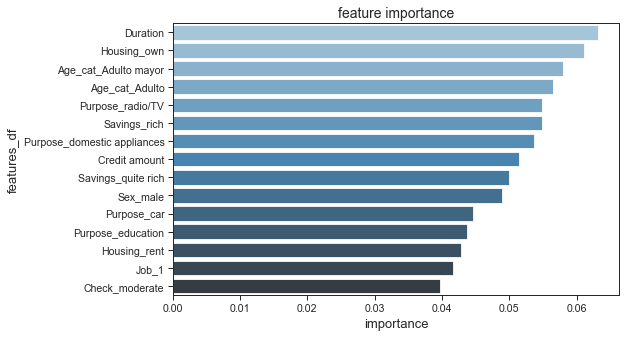

In [761]:
# display feature and their importance of the best model No puedo aplicar porq X_train no es df
feature_importance = pd.DataFrame({'feature': X_train.columns, 
                                   'importance': Grid_best_xgb.feature_importances_})

new_features_df = feature_importance[feature_importance['importance']>0
                                    ].sort_values(by=['importance'],ascending=False)

sns.set(context='paper', style='ticks',  font='sans-serif', 
        font_scale=1.2, color_codes=True, rc=None)
figure, ax = plt.subplots(figsize=(8, 5))
ax=sns.barplot(data = new_features_df[:15],
              y='feature',
              x='importance',
              palette='Blues_d') # rocket, Blues_d
ax.set_title('feature importance', fontsize=14)
ax.set_xlabel('importance', fontsize=13)
ax.set_ylabel('features_df', fontsize=13)
plt.show()  #funciona si mi X_train es un dataframe tb y no un array de numpy  buscar

In [762]:
new_features_df.head(18)  

,feature,importance
1,Duration,0.063177
10,Housing_own,0.061188
19,Age_cat_Adulto mayor,0.058060
18,Age_cat_Adulto,0.056533
6,Purpose_radio/TV,0.054874
14,Savings_rich,0.054831
3,Purpose_domestic appliances,0.053689
0,Credit amount,0.051508
13,Savings_quite rich,0.049984
9,Sex_male,0.048990


* Observation
El top 5 de las variables incluye:
    * Duration
    * Housing_own	
    * Age_cat_Adulto mayor
    * Age_cat_Adulto	
    * Purpose_radio/TV

              precision    recall  f1-score   support

           0       0.73      0.93      0.82       209
           1       0.56      0.20      0.29        91

    accuracy                           0.71       300
   macro avg       0.65      0.57      0.56       300
weighted avg       0.68      0.71      0.66       300



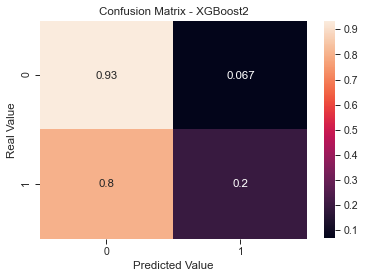

In [764]:
# prediction
#X_test_xgb2 = scaler.transform(X_test)
y_pred_xgb2= xgb_2.predict(X_test)

# classification report
print(classification_report(y_test, y_pred_xgb2))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_xgb2, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - XGBoost2')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

#'colsample_bytree': 0.9, 'gamma': 0.4, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250, 'subsample': 0.75}

In [765]:
#Modelo XGBoost definitivo teniendo en cuenta los best_parameters obtenidos por GridSearchCV que mostró 
#mejor AUROC frente a Randomized Grid Search. (Ver modelo con rank 1)

xgb_final = XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=250, gamma=0.1, random_state=42)   #acá ya no usé el random_state ni subsamples y ya no me salió 
                      #una advertencia que me salía sobre "algunos parámetros solo se usan en enlaces de idioma, pero transmitido al núcleo XGBoost"

In [766]:
xgb_final.fit(X_train, y_train)


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:42:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

              precision    recall  f1-score   support

           0       0.72      0.89      0.80       209
           1       0.46      0.21      0.29        91

    accuracy                           0.69       300
   macro avg       0.59      0.55      0.54       300
weighted avg       0.64      0.69      0.64       300



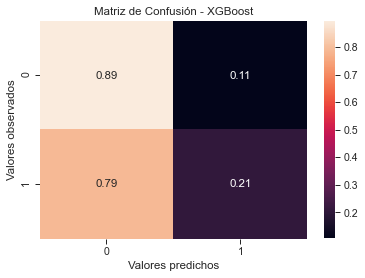

In [767]:
# prediction
#X_test_xgb = scaler.transform(X_test)
y_predi_xgb = xgb_final.predict(X_test)

# classification report
print(classification_report(y_test, y_predi_xgb))


# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_predi_xgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Matriz de Confusión - XGBoost')
ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores observados')

plt.show()


In [768]:
#Otra forma de calcular Accuracy
print("• Accuracy_score: ",(accuracy_score(y_test,y_predi_xgb)))

• Accuracy_score:  0.6866666666666666


In [769]:
#Matriz de confusión en valores absolutos
print("• Matriz de confusión: ", "\n", confusion_matrix(y_test, y_predi_xgb))

• Matriz de confusión:  
 [[187  22]
 [ 72  19]]


# **6.2 Modelo 2 Random Forest** <a id="Modelling_2"></a> <br>
- Usaremos Random Forest Classifier para predecir el score de crédito
- Se aplicará también Hiperparameter tunning
- Predicción
- Matriz de confusión

**[Regresar al menú principal](#Menú)** 

In [770]:
# print the rf base model
r_forest


RandomForestClassifier(max_depth=10, max_features=20, n_estimators=3,
                       random_state=42)

In [771]:
#r_forest = RandomForestClassifier(max_depth=10, max_features=20, n_estimators=3, random_state=42)
#model_assess(r_forest, "Random Forest Classifier")

In [772]:
#me salté el plot features

In [773]:
#Seting the Hyper Parameters de rforest
param_grid_rf = {"max_depth": [3,5, 7, 10,None],
                 "n_estimators":[3,5,10,25,50,150],   #por qué pone 150, La cantidad de árboles en el bosque. Pred es 100
                 "max_features": [4,7,15,20]}

#Creating the classifier
model_rf= RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(model_rf, param_grid=param_grid_rf, cv=10, scoring='recall', verbose=1)
grid_search_rf.fit(X_train, y_train) #acá se cocina ya la predicción

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  3.0min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [4, 7, 15, 20],
                         'n_estimators': [3, 5, 10, 25, 50, 150]},
             scoring='recall', verbose=1)

In [774]:
print("Mejor score Recall para modelo RF:", grid_search_rf.best_score_)
print("Mejores parámetros para RF usando GridSearchCV:", grid_search_rf.best_params_)


Mejor score Recall para modelo RF: 0.33999999999999997
Mejores parámetros para RF usando GridSearchCV: {'max_depth': None, 'max_features': 7, 'n_estimators': 3}


In [775]:
print(r_forest.feature_importances_)

[0.38690308 0.19207702 0.02080941 0.00422157 0.01987653 0.02296286
 0.0211118  0.00798223 0.0024016  0.03955634 0.0399581  0.01869632
 0.02419008 0.01159528 0.00249704 0.05133708 0.00779247 0.01569199
 0.04445743 0.0142717  0.01941483 0.01925104 0.01294419]


In [776]:
# Se vuelve a correr un modelo RF con los nuevos parámetros obtenidos por GridSearchCV
rfore = RandomForestClassifier(max_depth=None, max_features=7, n_estimators=3, random_state=2)  

# Entrenando con los mejores parámetros encontrados
rfore.fit(X_train, y_train)

RandomForestClassifier(max_features=7, n_estimators=3, random_state=2)

In [777]:
# Testeando el modelo  
# Prediciendo usando nuestro  modelo
y_predi_rf = rfore.predict(X_test)

# Verificar los resultados obtenidos
print("• Accuracy_score: ",(accuracy_score(y_test,y_predi_rf)))
print("\n")   #"\n" para dar espacio hacia abajo
print("• Matriz de confusión: ", "\n", confusion_matrix(y_test, y_predi_rf))
print("\n")
print("• fbeta score: ", fbeta_score(y_test, y_predi_rf, beta=2))  #b2 pues FN tienen más impacto

• Accuracy_score:  0.66


• Matriz de confusión:  
 [[169  40]
 [ 62  29]]


• fbeta score:  0.3348729792147806


              precision    recall  f1-score   support

           0       0.73      0.81      0.77       209
           1       0.42      0.32      0.36        91

    accuracy                           0.66       300
   macro avg       0.58      0.56      0.57       300
weighted avg       0.64      0.66      0.65       300



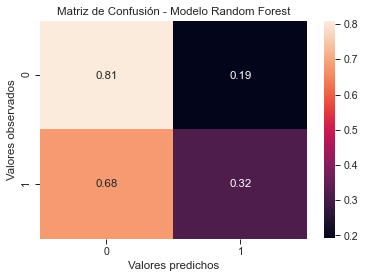

In [778]:
# classification report
print(classification_report(y_test, y_predi_rf))


# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_predi_rf, normalize='true'), annot=True, ax=ax)
ax.set_title('Matriz de Confusión - Modelo Random Forest')
ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores observados')

plt.show()

# **6.3 Modelo 3 Gaussian Naives Bayes** <a id="Modelling_3"></a> <br>
- Usaremos el modelo Gaussian Naives Bayes para predecir el score de crédito
- Predicción
- Matriz de confusión

**[Regresar al menú principal](#Menú)** 

In [779]:
#importando las librerías
from sklearn.naive_bayes import MultinomialNB
Gnaive_bayes = MultinomialNB()
Gnaive_bayes.fit(X_train, y_train)

MultinomialNB()

In [780]:
# Creando una instancia pera el modelo clasificador logreg
GNB = GaussianNB()

# Modelando con el set de entrenamiento (train set)
modelGNB = GNB.fit(X_train, y_train)

### Predicción

In [781]:
y_predi_gnb = modelGNB.predict(X_test)

In [782]:
#Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, y_predi_gnb)))
print('Precision score: ', format(precision_score(y_test, y_predi_gnb)))
print('Recall score: ', format(recall_score(y_test, y_predi_gnb)))
print('F1 score: ', format(f1_score(y_test, y_predi_gnb)))

Accuracy score:  0.6033333333333334
Precision score:  0.375
Recall score:  0.46153846153846156
F1 score:  0.41379310344827586


### Matriz de confusión


In [783]:
# Verificando los resultados obtenidos
print("• Accuracy_score: ",(accuracy_score(y_test,y_predi_gnb)))
print("\n")  
print("• Matriz de confusión en valores absolutos: ", "\n", confusion_matrix(y_test, y_predi_gnb))
print("\n")
print("• fbeta score con beta=2: ", fbeta_score(y_test, y_predi_gnb, beta=2))  #b2 pues FalseNeg. tienen más impacto

• Accuracy_score:  0.6033333333333334


• Matriz de confusión en valores absolutos:  
 [[139  70]
 [ 49  42]]


• fbeta score con beta=2:  0.4411764705882353


              precision    recall  f1-score   support

           0       0.74      0.67      0.70       209
           1       0.38      0.46      0.41        91

    accuracy                           0.60       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.63      0.60      0.61       300



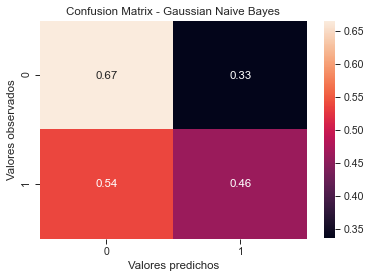

In [784]:
# classification report
print(classification_report(y_test, y_predi_gnb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_predi_gnb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - Gaussian Naive Bayes')
ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores observados')

plt.show()

<b>* Comentario: </b> <br> Al emplear este modelo para ajustar nuestros datos, se observa una mejora considerable en el  porcentaje de Falsos negativos (0.54), que en los modelos anteriores superaron el 0.70. También la métrica Recall mejora en comparación con los otros 2 modelos, lo cual tiene lógica pues Recall guarda relación con el porcentaje de False Negatives. También se observa que la métrica f1-score que implica un equilibrio entre Recall y Precisión. 

* Nota: Naive Bayes funciona bien desde el principio y ajustar sus parámetros es raramente necesario. 
    https://medium.com/datos-y-ciencia/algoritmos-naive-bayes-fudamentos-e-implementaci%C3%B3n-4bcb24b307f

In [786]:
# Verificando los resultados obtenidos
print("• Accuracy_score: ",(accuracy_score(y_test,y_predi_rf)))
print("\n")   #"\n" para dar espacio hacia abajo
print("• Matriz de confusión (en valores absolutos): ", "\n", confusion_matrix(y_test, y_predi_rf))
print("\n")
print("• fbeta score con beta=2: ", fbeta_score(y_test, y_predi_rf, beta=2)) #b2 pues FalseNeg tienen más 
                                                                            #impacto en este caso de estudio

• Accuracy_score:  0.66


• Matriz de confusión (en valores absolutos):  
 [[169  40]
 [ 62  29]]


• fbeta score con beta=2:  0.3348729792147806


<b> * Acerca de los resultados obtenidos: </b> <br> En este caso de estudio se intentó mejorar el Recall, como resultado el modelo Gaussian Naive Bayes muestra una mejora considerable, sin embargo, todavía se podría recurrir a otras estrategias para incrementar dicha métrica. Con este objetivo, previo a la modelación, se hizo un ajuste en el número de datos para el 'test dataset' de 25% a un 30% con lo cual, se obtuvieron resultados ligeramente mejores, de la misma manera, se aplicaron técnicas de ajuste de hiperparámetros como Randomized Search o Grid Search CV. <br> 
<br>
<b> * Recomendaciones: </b> <br>
El objetivo en este caso de estudio fue reducir cuanto sea posible el número de False Negatives (menos es mejor). Mientras menor sea, el modelo podría detectar mejor a las personas que tienen mayor probabilidad de tener un 'Risk' malo. El número de falsos negativos alto podría derivar en clasificaciones erróneas que ubiquen a clientes con una calificación creditica mala como buena y otorgarles un crédito, bajo el riesgo de que incurran en mora, lo cual pudiera representar pérdidas futuras para la entidad bancaria. <br>Sin embargo, también es importante mantener un buen nivel de False Positives, de manera tal que no se clasifique a posibles buenos clientes como si fuesen malos, con lo cual la entidad podría estar perdiendo oportunidades de negocio importantes con potenciales clientes.  Como última recomendación, sería interesante probar con otros modelos de aprendizaje que pudieran capturar con un mejor ajuste el comportamiento de nuestros datos y obtener mejores resultados para métricas como el f1-score (mayor es mejor).  <br>
<br>
<b> * Modelo final: </b> <br>
Dicho esto, emplearemos el tercer modelo (GNB) como el definitivo para hacer las predicciones y su posterior implementación, sin embargo es importante tener en consideración las observaciones mencionadas. 

### Guardamos el modelo en un archivo .pkl para su futura implementación

In [787]:
import pickle
# abre un archivo, donde quieras almacenar los datos
file = open('credit_score_vm.pkl', 'wb') #write binary

# volcar información en ese archivo
pickle.dump(modelGNB, file)

In [788]:
model = open('credit_score_vm.pkl','rb')  #read binary
gaussianNB = pickle.load(model)  

## Créditos: <a id="Créditos"></a> <br>

**[Regresar al menú principal](#Menú)** 

<b>Leonardo Ferreira</b>
* https://www.kaggle.com/kabure/predicting-credit-risk-model-pipeline/notebook <br>
* https://nc-proxy.binderhub-prod.gcp.oreilly.com/user/binderhub-predi-model-pipelines-z6621ja6/notebooks/predicting-credit-risk-model-pipeline.ipynb#
<br>

<b>Zhaoyun Ma</b>
* https://www.kaggle.com/zhaoyunma/credit-risk-prediction/notebook

## Referencias bibliográficas:  <a id="Referencias"></a> <br>
**[Regresar al menú principal](#Menú)** 

* Analytics Vidhya (2021). _Complete Guide to Parameter Tuning in XGBoost with codes in Python._ Extraído de: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/    
* Barrios, J. (30 de septiembre de 2021). _La matriz de confusión y sus métricas._ Extraído de: https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/
* Towards Data Science (2021): _Doing XGBoost hyper-parameter tuning the smart way — Part 1 of 2._ Extraído de: https://towardsdatascience.com/doing-xgboost-hyper-parameter-tuning-the-smart-way-part-1-of-2-f6d255a45dde 
* Victor Roman (2019). _Algoritmos Naive Bayes: Fundamentos e Implementación._ Extraído de: https://medium.com/datos-y-ciencia/algoritmos-naive-bayes-fudamentos-e-implementaci%C3%B3n-4bcb24b307f
* XG Boost Documentation (2021). _XG Boost documentation_. Extraído de: https://xgboost.readthedocs.io/en/latest/parameter.html